

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [7]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [9]:
(x_trainbk, y_trainbk, x_testbk, y_testbk) = (x_train, y_train, x_test, y_test)

In [19]:
(x_train, y_train, x_test, y_test) = (x_trainbk, y_trainbk, x_testbk, y_testbk)

### 2. Visualize the First 24 Training Images

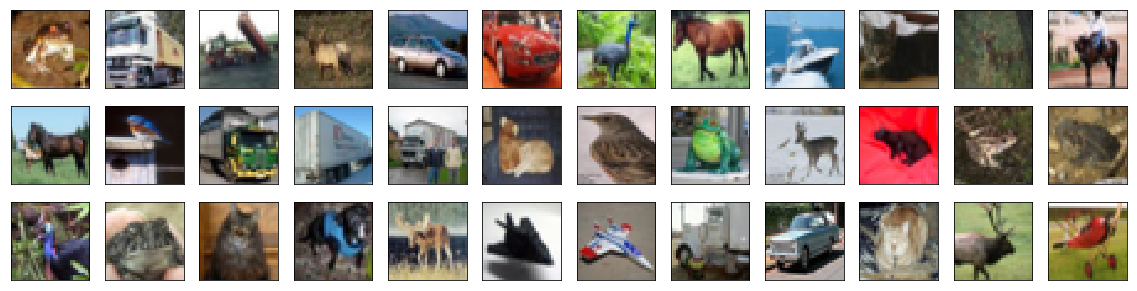

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [21]:
x_train[1][0][0]

array([154, 177, 187], dtype=uint8)

In [22]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [23]:
x_train[1][0][0]

array([0.6039216 , 0.69411767, 0.73333335], dtype=float32)

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [25]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

### 6. Compile the Model 

In [27]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [28]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 20s - loss: 1.6020 - acc: 0.4198 - val_loss: 1.6135 - val_acc: 0.4548

Epoch 00001: val_loss improved from inf to 1.61350, saving model to model.weights.best.hdf5
Epoch 2/100
 - 19s - loss: 1.2671 - acc: 0.5497 - val_loss: 1.2509 - val_acc: 0.5384

Epoch 00002: val_loss improved from 1.61350 to 1.25091, saving model to model.weights.best.hdf5
Epoch 3/100
 - 19s - loss: 1.1437 - acc: 0.5952 - val_loss: 1.0760 - val_acc: 0.6200

Epoch 00003: val_loss improved from 1.25091 to 1.07601, saving model to model.weights.best.hdf5
Epoch 4/100
 - 20s - loss: 1.0820 - acc: 0.6206 - val_loss: 1.2522 - val_acc: 0.5540

Epoch 00004: val_loss did not improve from 1.07601
Epoch 5/100
 - 20s - loss: 1.0397 - acc: 0.6359 - val_loss: 0.9805 - val_acc: 0.6670

Epoch 00005: val_loss improved from 1.07601 to 0.98049, saving model to model.weights.best.hdf5
Epoch 6/100
 - 18s - loss: 1.0152 - acc: 0.6469 - val_loss: 1.0728 - val_acc: 0.6404

Epoc


Epoch 00058: val_loss did not improve from 0.95765
Epoch 59/100
 - 20s - loss: 1.5865 - acc: 0.4670 - val_loss: 1.7496 - val_acc: 0.4402

Epoch 00059: val_loss did not improve from 0.95765
Epoch 60/100
 - 20s - loss: 1.6145 - acc: 0.4627 - val_loss: 1.3292 - val_acc: 0.5386

Epoch 00060: val_loss did not improve from 0.95765
Epoch 61/100
 - 20s - loss: 1.6038 - acc: 0.4595 - val_loss: 1.5711 - val_acc: 0.4836

Epoch 00061: val_loss did not improve from 0.95765
Epoch 62/100
 - 20s - loss: 1.6509 - acc: 0.4484 - val_loss: 1.7992 - val_acc: 0.3590

Epoch 00062: val_loss did not improve from 0.95765
Epoch 63/100
 - 20s - loss: 1.6415 - acc: 0.4447 - val_loss: 1.4722 - val_acc: 0.4738

Epoch 00063: val_loss did not improve from 0.95765
Epoch 64/100
 - 20s - loss: 1.6586 - acc: 0.4431 - val_loss: 2.7107 - val_acc: 0.3618

Epoch 00064: val_loss did not improve from 0.95765
Epoch 65/100
 - 20s - loss: 1.6763 - acc: 0.4295 - val_loss: 1.4917 - val_acc: 0.5068

Epoch 00065: val_loss did not imp

### 8. Load the Model with the Best Validation Accuracy

In [29]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [30]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6659


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [31]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

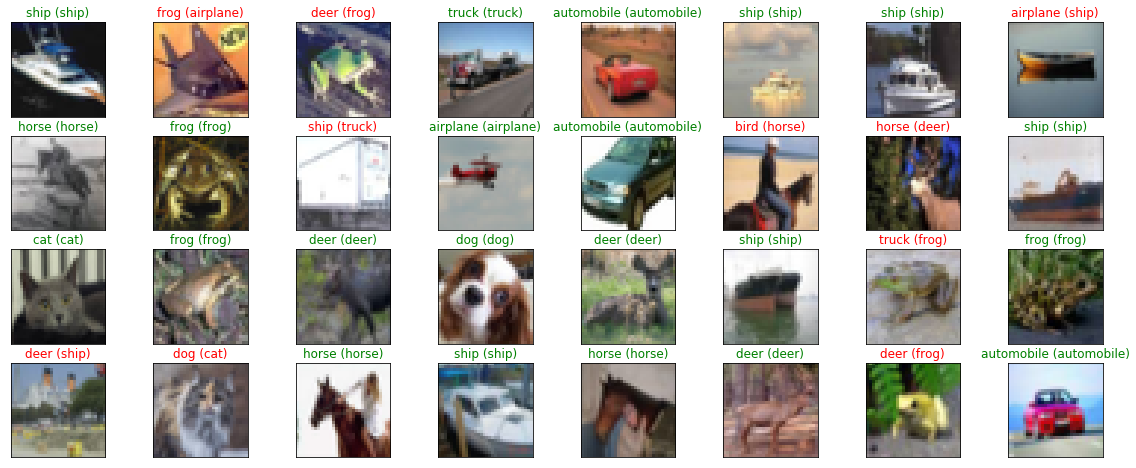

In [32]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))